In [1]:
import numpy as np

real_width = 5
real_offset = 0
imag_height = 5
imag_offset = 0

ITERATIONS = 10
WIDTH = 300
HEIGHT = 300

from root import Root
roots = [Root(1, 1, (255,255, 0)), Root(.5, .5, (255,0,0)), Root(3,3,(0,0,255))]


def distance_between(pos1, pos2):
    result = (pos1.real - pos2.real) ** 2 + (pos1.imag - pos2.imag) ** 2
    return result

def distance_between_tuples(pos1, pos2):
    return ((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)**.5

def complex_to_pix(root:Root):
    x = root.real / real_width * WIDTH
    y = root.imag / imag_height * HEIGHT
    return x,y

def pix_to_complex(pos):
    x = pos[0] / WIDTH * real_width 
    y = pos[1] / HEIGHT * imag_height
    return x,y

def f(x):
    current = np.full(x.shape, np.complex64(1))
    for root in roots:
        current *= (x - root.complex)
    return current

def f_prime(x):
    step = .000001
    return (f(x + step) - f(x)) / step

x = np.linspace(real_offset, real_width, WIDTH)
y = np.linspace(imag_offset, imag_height, HEIGHT)
reals, imags = np.meshgrid(x,y)
c = np.complex64(pix_to_complex((reals,imags)))
print(c.shape)
#for _ in range(ITERATIONS):
#    c = c - f(c) / f_prime(c)

c

(2, 300, 300)


array([[[0.        +0.j, 0.00027871+0.j, 0.00055741+0.j, ...,
         0.08277592+0.j, 0.08305462+0.j, 0.08333334+0.j],
        [0.        +0.j, 0.00027871+0.j, 0.00055741+0.j, ...,
         0.08277592+0.j, 0.08305462+0.j, 0.08333334+0.j],
        [0.        +0.j, 0.00027871+0.j, 0.00055741+0.j, ...,
         0.08277592+0.j, 0.08305462+0.j, 0.08333334+0.j],
        ...,
        [0.        +0.j, 0.00027871+0.j, 0.00055741+0.j, ...,
         0.08277592+0.j, 0.08305462+0.j, 0.08333334+0.j],
        [0.        +0.j, 0.00027871+0.j, 0.00055741+0.j, ...,
         0.08277592+0.j, 0.08305462+0.j, 0.08333334+0.j],
        [0.        +0.j, 0.00027871+0.j, 0.00055741+0.j, ...,
         0.08277592+0.j, 0.08305462+0.j, 0.08333334+0.j]],

       [[0.        +0.j, 0.        +0.j, 0.        +0.j, ...,
         0.        +0.j, 0.        +0.j, 0.        +0.j],
        [0.00027871+0.j, 0.00027871+0.j, 0.00027871+0.j, ...,
         0.00027871+0.j, 0.00027871+0.j, 0.00027871+0.j],
        [0.00055741+0.j, 

In [41]:
color_shape = [300,300,3]
colors = np.zeros(color_shape)
nearest_color = np.empty((300,300,3))
nearest_distance = np.full((1,90000),np.inf)


In [29]:
from scipy.spatial.distance import cdist
def distance_between(pos1, pos2):
    return cdist(pos1, pos2)

(1, 90000)

In [46]:
for root in roots:
    c.shape = (2,300**2)
    distance = np.sqrt(((c[:, None] - np.complex64(1.5+1.5j)) ** 2).sum())
    distance.shape
    nearest_distance.shape = (1,300**2)
    mask = np.greater(nearest_distance, distance)
    nearest_distance = np.where(mask, distance, nearest_distance)
    mask.shape = (300,300,1)
    nearest_color = np.where(mask, np.full((300,300,3),np.array(root.color)), nearest_color)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


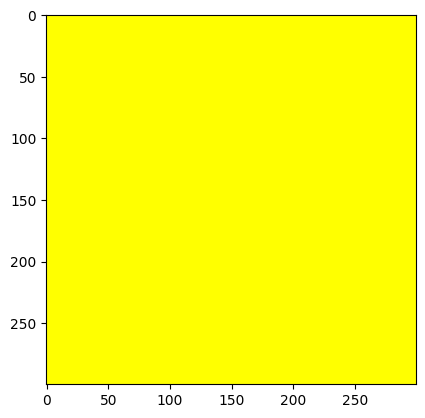

In [47]:
from matplotlib import pyplot as plt
plt.imshow(nearest_color, interpolation='nearest')
plt.show()